# EDA - Understanding The Economic Context
##### This workbook focuses on CPI, GDP, Credit and Disposible Income in the US from 2001-2023

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../code/')
from time_series_plots import plot_time_series
sns.set_style("darkgrid")

np.random.seed(42)

In [2]:
df_FRB = pd.read_csv("../data/frb_monthly_debt_bal_clean.csv", index_col='date', parse_dates=True)

In [3]:
df = pd.read_csv('../data/master_acd_gdp_ffr.csv', index_col='date', parse_dates=True)
df.drop(columns=['year', 'month'], inplace=True)
df.head()


,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,imports_yoy,...,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m,gdp,gdp_yoy,fedfunds
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,13.143736,2.760736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10470.231000,4.679500,5.98
2001-02-01,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,8.400292,0.200602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10513.154000,4.255523,5.49
2001-03-01,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,-6.099935,-1.601602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10556.077000,3.838372,5.31
2001-04-01,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,3.851262,-0.710660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10599.000000,3.427884,4.80
2001-05-01,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,15.420561,-0.809717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.673333,3.188251,4.21


In [4]:
# make subset of particular variables to focus on
df_subset = df[[
    'gdp_yoy', 'fedfunds', 'credit_yoy', 'cpi_yoy', 
    'personal_saving_as_a_percentage_of_disposable_personal_income',
    'disp_inc_per_capita_current_dollars',
    'disp_inc_per_capita_chained_2017', 
    'total_disposable_personal_income',
    'cc_bals_90d_due_percentage', 
    'cc_bals_30d_due_percentage',
    'cc_balance_total_billions']]
df_subset = df_subset.merge(df_FRB[['total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)']],
              left_index=True, right_index=True, how='left')
df_subset['total_consumer_credit'] = df_subset['total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)'] * 1000000
df_subset.drop(columns = 'total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)', inplace=True)
df_subset.head()

,gdp_yoy,fedfunds,credit_yoy,cpi_yoy,personal_saving_as_a_percentage_of_disposable_personal_income,disp_inc_per_capita_current_dollars,disp_inc_per_capita_chained_2017,total_disposable_personal_income,cc_bals_90d_due_percentage,cc_bals_30d_due_percentage,cc_balance_total_billions,total_consumer_credit
date,,,,,,,,,,,,
2001-01-01,4.679500,5.98,12.391364,3.732227,4.5,26946.0,35962.0,7.651692e+12,NaN,NaN,NaN,1.744174e+12
2001-02-01,4.255523,5.49,12.757135,3.533569,4.6,27000.0,35977.0,7.672371e+12,NaN,NaN,NaN,1.746978e+12
2001-03-01,3.838372,5.31,12.611905,2.920561,4.9,27064.0,36059.0,7.696337e+12,NaN,NaN,NaN,1.749724e+12
2001-04-01,3.427884,4.80,12.895804,3.269119,4.8,27034.0,35956.0,7.693797e+12,NaN,NaN,NaN,1.765924e+12
2001-05-01,3.188251,4.21,12.498904,3.615160,4.3,27034.0,35862.0,7.700196e+12,NaN,NaN,NaN,1.773883e+12


In [5]:
df_subset.describe()

,gdp_yoy,fedfunds,credit_yoy,cpi_yoy,personal_saving_as_a_percentage_of_disposable_personal_income,disp_inc_per_capita_current_dollars,disp_inc_per_capita_chained_2017,total_disposable_personal_income,cc_bals_90d_due_percentage,cc_bals_30d_due_percentage,cc_balance_total_billions,total_consumer_credit
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,2.760000e+02,133.000000,133.000000,133.000000,2.760000e+02
mean,4.399489,1.591775,5.008511,2.528411,5.791304,40431.054348,42484.927536,1.280278e+13,1.196090,2.438271,656.183459,3.090409e+12
std,2.891879,1.750026,3.084354,1.834622,3.337217,9279.270569,4483.042985,3.544269e+12,0.224531,0.381280,75.525776,9.041125e+11
min,-6.881681,0.050000,-4.125881,-2.097161,1.400000,26946.000000,35843.000000,7.651692e+12,0.720000,1.560000,551.970000,1.744174e+12
25%,3.369684,0.130000,4.423791,1.513777,4.400000,33488.000000,39571.750000,1.003446e+13,1.050000,2.203333,589.616667,2.410295e+12
50%,4.251893,1.010000,5.516718,2.160308,5.400000,38930.500000,40941.500000,1.226710e+13,1.196667,2.476667,649.973333,2.794776e+12
75%,5.745537,2.392500,6.655239,3.258220,6.300000,46365.750000,45643.750000,1.521990e+13,1.340000,2.726667,702.596667,3.832957e+12
max,16.969792,5.980000,12.895804,9.059758,32.000000,65833.000000,61509.000000,2.185808e+13,1.730000,3.190000,864.340000,5.010284e+12


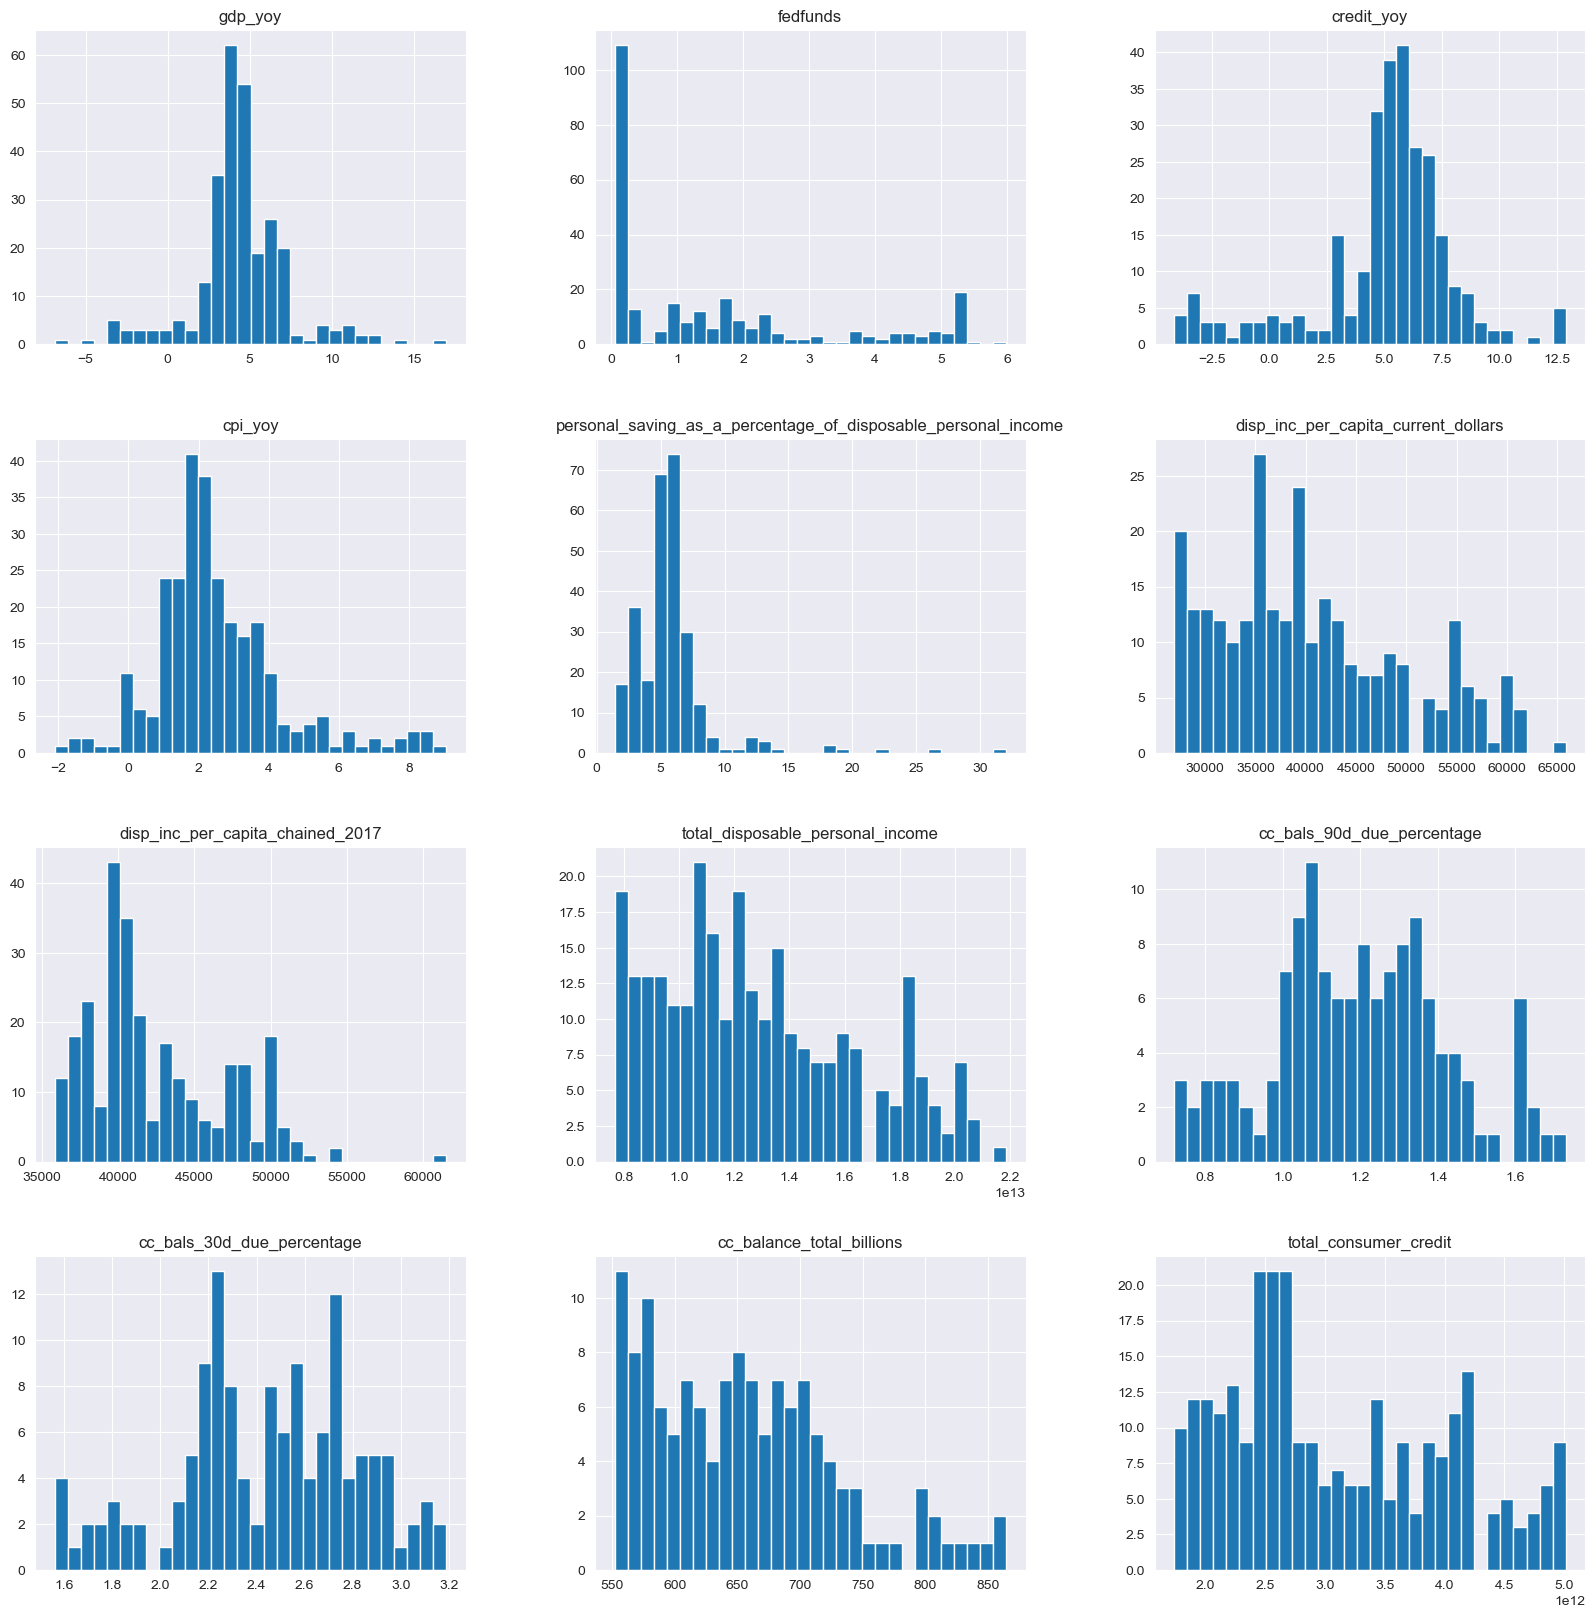

In [6]:
df_subset.hist(bins = 30, figsize = (20, 20));

- CPI slightly left skewed, centred around median of 2.13%, slightly above FED target of 2%. Minimum of -2% and max 9% for the given period.
- GDP growth monthly centred around median of 0.384, annual 4.32% average.
- Huge spike in fed funds rate at 1% - the 'zerp era' - max of 5.98%.
- Personal savings as percent of disposible income very right skewed, a long tail of periods with abnormally high personal savings. 
- Disposible income per capita **current dollars** skewed right with a very flat distribution, a wide varience from 26946 to 65833. This might be explained by inflation, the nominal value of currency in the actual dollars of that specific year. 
- Disposible income per capita **chained 2017** is adjusted for inflation. Interestingly also has a wide quite flat distribution, a varience from 35843 to 61509. Median of $41,000
- Credit growth % yoy is fairly normally distrbuted around a mean of 5%. With anomolies of periods with negative growthm growth close to zero and up to 12.9% growth. 

## GDP Growth & Fed Funds Rate

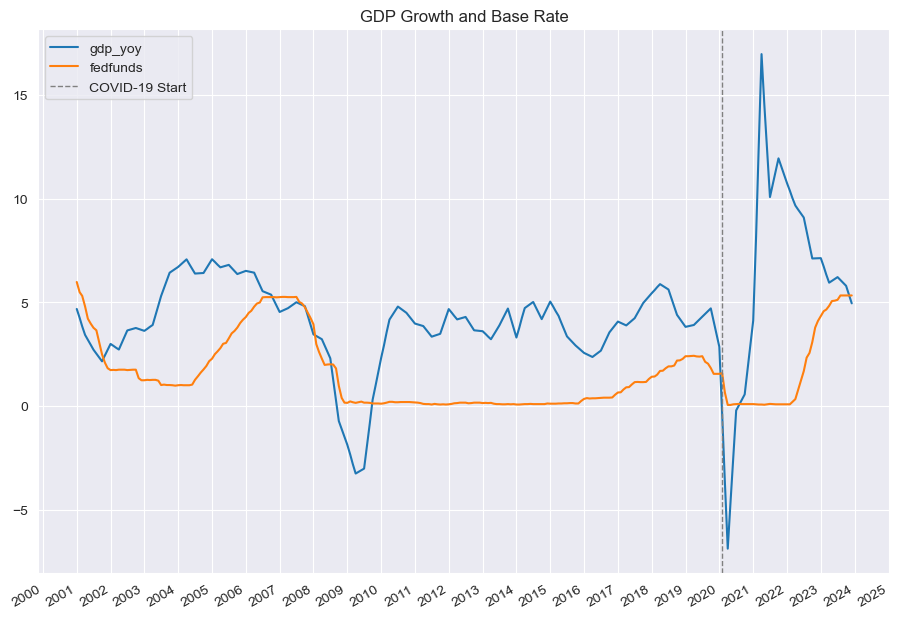

In [7]:
plot_time_series(df, columns = ['gdp_yoy',
                                'fedfunds'],title = 'GDP Growth and Base Rate', covid_start = True);

- Largest drop in yoy GDP growth seen in the wake of covid early 2020. 
- Early 2023 fed begins to hike rates to highs not seen since the 2008 crisis. 

## Credit Growth & Inflation

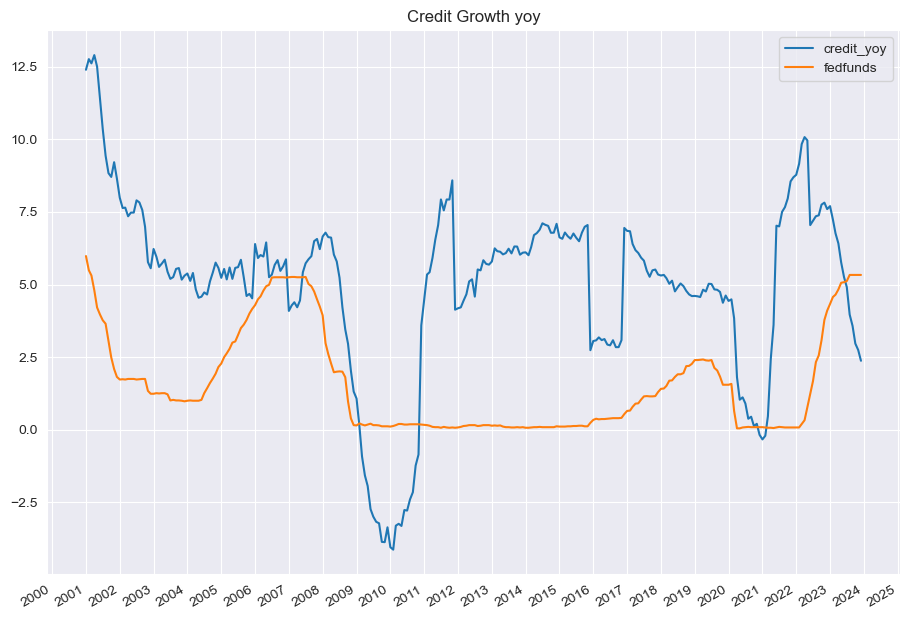

In [8]:
plot_time_series(df, columns = ['credit_yoy', 'fedfunds'],title = 'Credit Growth yoy');

In [9]:
df.corr(numeric_only=True)['credit_yoy'].sort_values(ascending=False)

credit_yoy                                                       1.000000
shelter_yoy                                                      0.520146
Mortgage_servicing_yoy                                           0.458956
cpi_yoy                                                          0.448303
gdp_yoy                                                          0.384757
                                                                   ...   
total_personal_savings                                          -0.279951
personal_saving_as_a_percentage_of_disposable_personal_income   -0.306737
HE Revolving                                                    -0.360207
unemployment_insurance                                          -0.367702
unemployment_rate                                               -0.547609
Name: credit_yoy, Length: 66, dtype: float64

- Top 4 variables most correlated with credit growth are measures of inflation shelter in partiocular, mortgage servicing, CPI and GDP itself. The next highest correlated is 30 year mortage rates. 
- The unemployment rate is 0.56 negatively correlated with credit growth. Which we would expect to see, as less people are unemployed more people have access to and are willing to take on credit because they have a reliable stream of income. Basically, consumer confidence, credit worthiness and disposible income. 

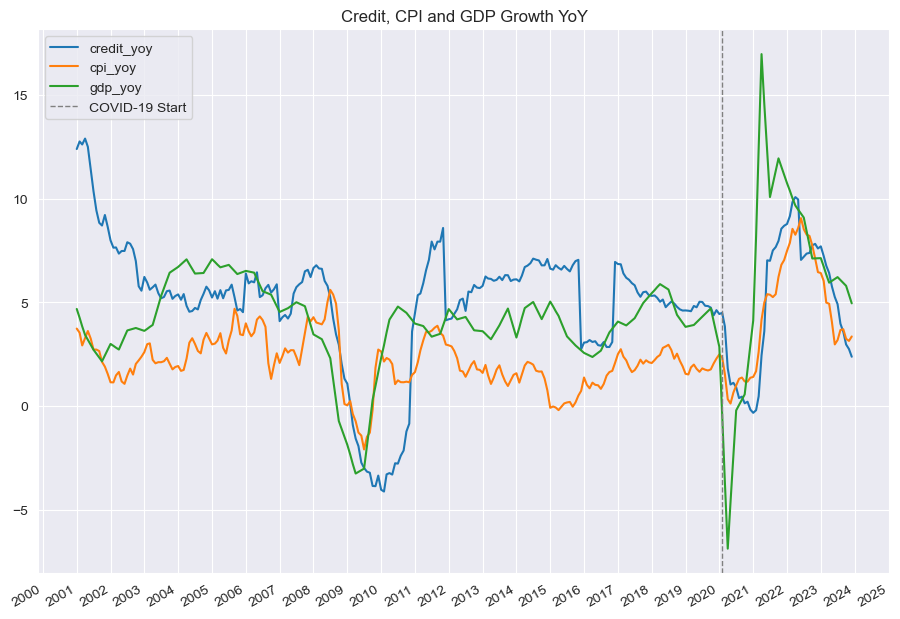

In [10]:
plot_time_series(df, columns = ['credit_yoy', 'cpi_yoy', 'gdp_yoy'], title = 'Credit, CPI and GDP Growth YoY', covid_start=True)

- Here we see the aforementioned positive correlations. 
- GDP yoy growth appears to be a lagging indicator of credit growth. 
- Large correlated falls in 2008 and covid-era. 

In [11]:
# make a series of the cross correlations 
ccf = pd.Series(np.correlate(df['credit_yoy'], df['gdp_yoy'], mode='full'))

# find the lag with the highest correlation
max_lag = ccf.idxmax() - (len(df['credit_yoy']) - 1)
max_lag

4

In [12]:
lag_gdp = df[['credit_yoy', 'gdp_yoy']].copy()
lag_gdp['GDP_Growth_4_month_lag'] = df['gdp_yoy'].shift(max_lag)


In [13]:
lag_gdp.corr(numeric_only=True)['credit_yoy'].sort_values(ascending=False)

credit_yoy                1.000000
GDP_Growth_4_month_lag    0.607092
gdp_yoy                   0.384757
Name: credit_yoy, dtype: float64

- We can see that the 4-month lagged GDP growth is the most correlated with the credit growth at 0.62 correlation. 

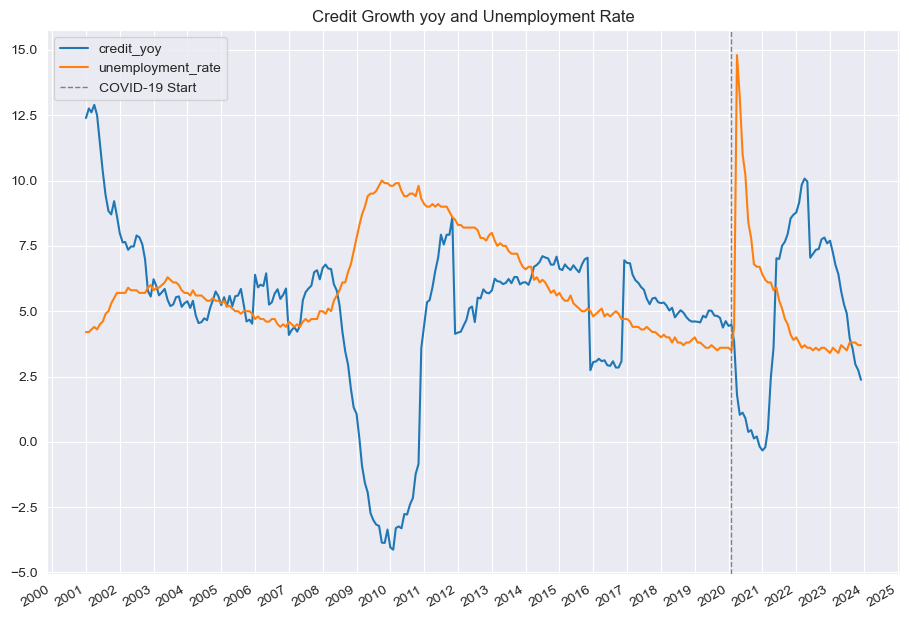

In [14]:
plot_time_series(df, columns = ['credit_yoy', 'unemployment_rate',
                                ], title = 'Credit Growth yoy and Unemployment Rate', covid_start=True);

# Inflation CPI compared to import and vehicles new/used 

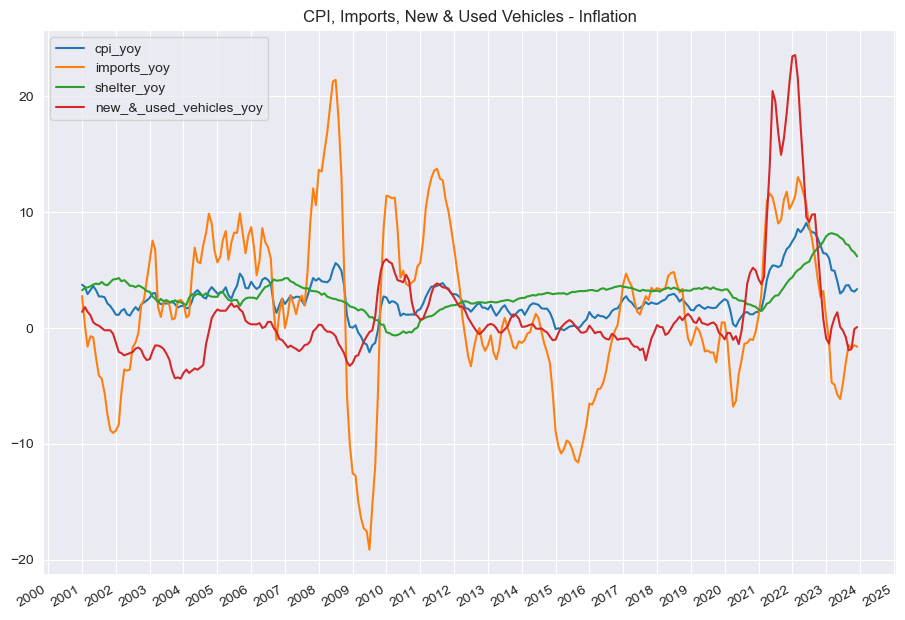

In [15]:
plot_time_series(df, columns = ['cpi_yoy', 
                                'imports_yoy',
                                'shelter_yoy', 
                                'new_&_used_vehicles_yoy'], title = 'CPI, Imports, New & Used Vehicles - Inflation')

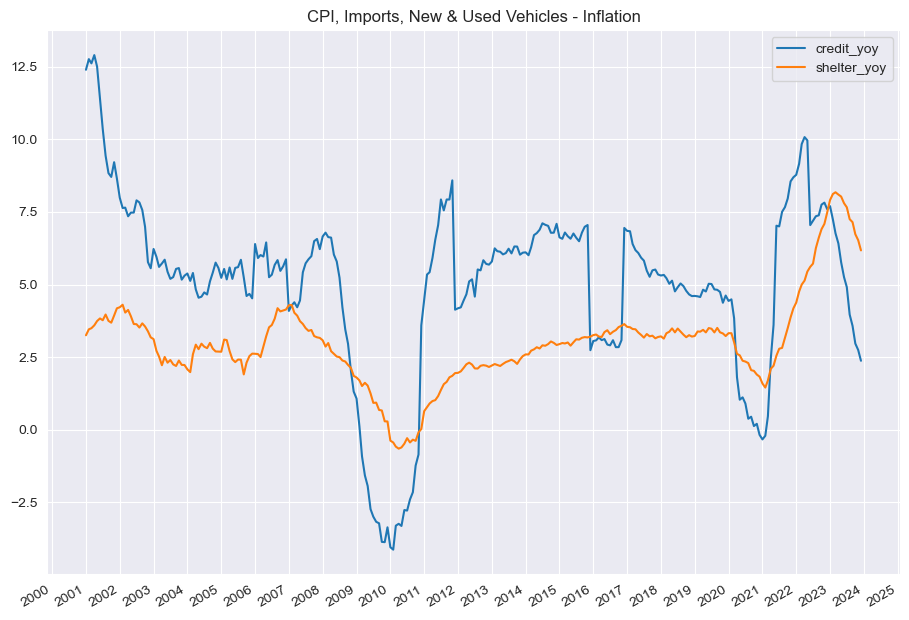

In [16]:
plot_time_series(df, columns = ['credit_yoy', 
                                'shelter_yoy'], title = 'CPI, Imports, New & Used Vehicles - Inflation')

In [17]:
# make a series of the cross correlations 
ccf_2 = pd.Series(np.correlate(df['credit_yoy'], df['shelter_yoy'], mode='full'))

# find the lag with the highest correlation
max_lag_2 = ccf_2.idxmax() - (len(df['credit_yoy']) - 1)
max_lag_2

-4

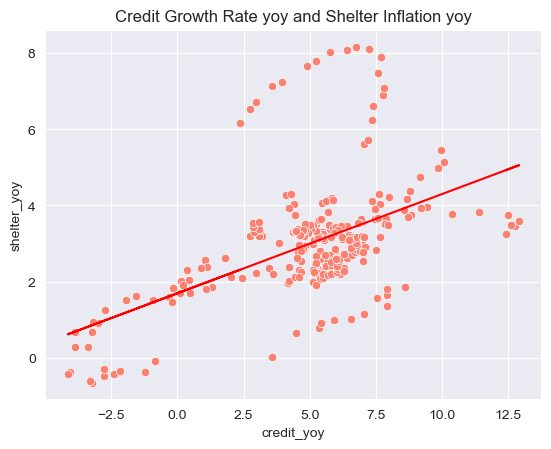

In [18]:
sns.scatterplot(df, x = 'credit_yoy', y ='shelter_yoy',
                color = 'salmon')
plt.title('Credit Growth Rate yoy and Shelter Inflation yoy');
plt.plot(df['credit_yoy'], np.poly1d(np.polyfit(df['credit_yoy'], df['shelter_yoy'], 1))(df['credit_yoy']), color='red');

# Disposable Income

Exploration of disposable income and savings as a percentage of disposable income. To see changes overtime and if they have a relationship with credit growth.

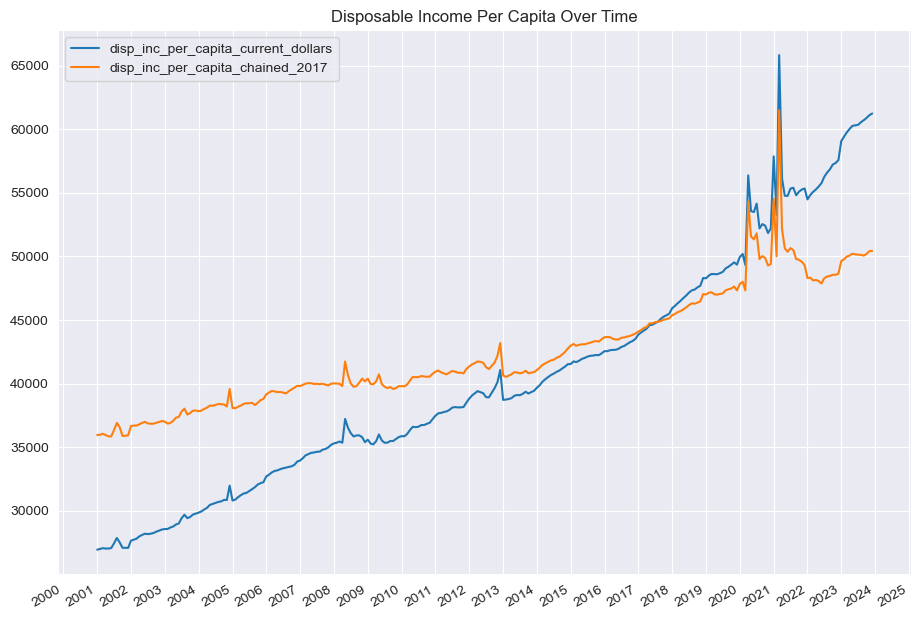

In [19]:
# plot personal savings as % of disposable income over time 
plot_time_series(df_subset, columns = [ 'disp_inc_per_capita_current_dollars',
                                       'disp_inc_per_capita_chained_2017'],
                                         title = 'Disposable Income Per Capita Over Time');

- Large peaks in the disposable income per capita early 2020 - when covid first struck and 

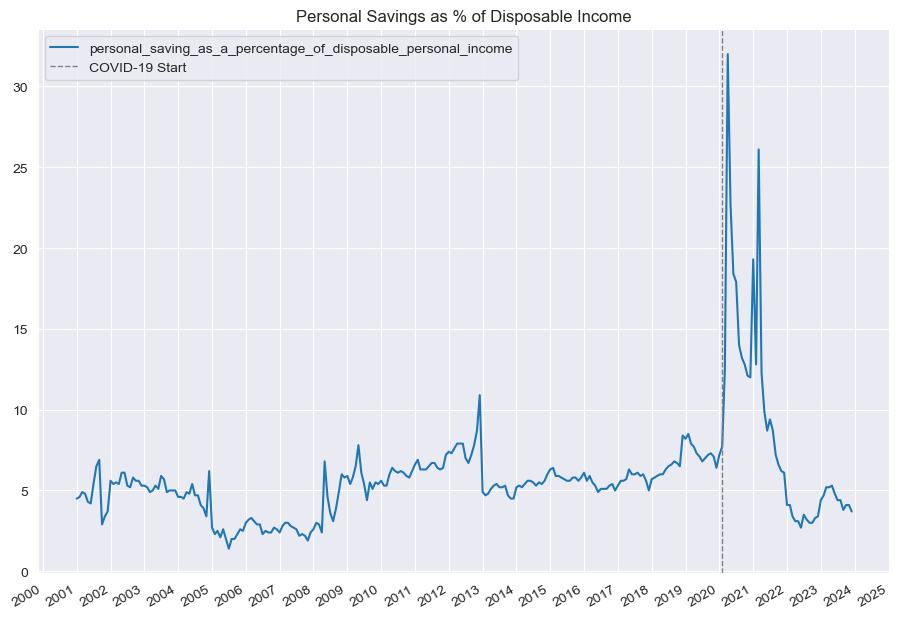

In [20]:
plot_time_series(df_subset, columns = ['personal_saving_as_a_percentage_of_disposable_personal_income'],
                  title = 'Personal Savings as % of Disposable Income', covid_start=True);

In [21]:
df.corr(numeric_only=True)['personal_saving_as_a_percentage_of_disposable_personal_income'].sort_values(ascending=False).head(10)

personal_saving_as_a_percentage_of_disposable_personal_income    1.000000
total_personal_savings                                           0.961533
unemployment_insurance                                           0.721666
total_gov_social_benefits                                        0.627349
disp_inc_per_capita_chained_2017                                 0.545301
total_disposible_personal_income_chained_2017                    0.506678
Student Loan                                                     0.443767
unemployment_rate                                                0.434669
disp_inc_per_capita_current_dollars                              0.405410
total_disposable_personal_income                                 0.404414
Name: personal_saving_as_a_percentage_of_disposable_personal_income, dtype: float64

In [22]:
df.corr(numeric_only=True)['personal_saving_as_a_percentage_of_disposable_personal_income'].sort_values(ascending=False).tail(10)

credit_yoy                          -0.306737
cc_payments_yoy                     -0.313187
Mortgage_servicing_yoy              -0.355108
cc_bals_30d_due_percentage_6m       -0.368975
cc_bals_30d_due_percentage_yoy      -0.373397
Mortgage_servicing                  -0.394428
fedfunds                            -0.430959
cc_bals_30d_due_percentage_yoy_6m   -0.444191
cc_bals_30d_due_percentage_yoy_3m   -0.456094
mortgage_rate_30_yr                 -0.552155
Name: personal_saving_as_a_percentage_of_disposable_personal_income, dtype: float64

Positive correlation observed between credit growht and shelter inflation. 

### Loan Delinquency By State

In [23]:
df_cc90 = pd.read_csv('../data/90_day_cc_delinquency_by_state.csv')
df_cc90.head()

,state,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,...,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021,Q4_2022
0,AK,5.21,5.68,5.20,6.61,6.40,5.58,7.01,7.61,5.65,...,5.00,3.98,5.36,5.01,5.83,6.34,6.58,7.84,7.53,6.46
1,AL,11.92,11.09,10.70,11.88,11.07,10.13,11.61,11.94,10.23,...,9.05,7.69,7.45,7.16,7.68,7.73,8.37,9.14,8.53,8.17
2,AR,11.22,10.75,10.08,11.38,10.79,10.15,11.79,11.54,9.61,...,8.58,7.01,7.63,7.81,8.66,9.06,9.74,10.74,10.23,9.49
3,AZ,8.97,9.19,8.34,9.10,8.96,10.95,16.36,17.26,14.44,...,12.00,8.94,9.26,8.63,9.54,9.87,10.39,10.93,9.40,8.01
4,CA,8.84,8.55,7.65,8.98,9.32,11.57,17.19,17.71,14.87,...,11.14,8.06,8.48,8.15,8.37,8.23,8.70,10.41,9.07,7.90


In [24]:
df_melted_cc90 = df_cc90.melt(id_vars=["state"], var_name="year", value_name="delinquency")
# remove 'Q4' from year column names  
df_melted_cc90['year'] = df_melted_cc90['year'].apply(lambda x: int(x.split('_')[1]))
df_melted_cc90.describe()
df_melted_cc90

,state,year,delinquency
0,AK,2003,5.21
1,AL,2003,11.92
2,AR,2003,11.22
3,AZ,2003,8.97
4,CA,2003,8.84
...,...,...,...
1055,WA,2022,5.23
1056,WI,2022,4.94
1057,WV,2022,8.35
1058,WY,2022,6.67


In [25]:
df_melted_cc90['year'] = pd.to_datetime(df_melted_cc90['year'], format='%Y')
df_melted_cc90['year'] = df_melted_cc90['year'].dt.year
df_melted_cc90.head()

,state,year,delinquency
0,AK,2003,5.21
1,AL,2003,11.92
2,AR,2003,11.22
3,AZ,2003,8.97
4,CA,2003,8.84


In [26]:
delinquency_by_state = df_melted_cc90.groupby('state')['delinquency'].mean().sort_values(ascending=False)
state_most_delinquency = delinquency_by_state.sort_values(ascending=False).head(10)
print(state_most_delinquency)
state_least_delinquency = delinquency_by_state.sort_values(ascending=False).tail(10)
print(state_least_delinquency)

state
NV    13.177500
FL    12.587000
PR    12.001429
TX    10.818500
AZ    10.690500
CA    10.322500
SC    10.284500
MS    10.216500
AR     9.768000
AL     9.555500
Name: delinquency, dtype: float64
state
IA    6.9880
UT    6.9730
VA    6.8915
WA    6.6905
MN    6.6250
SD    6.5470
NE    6.4920
WI    6.1680
AK    6.0050
ND    5.4890
Name: delinquency, dtype: float64


In [27]:
states_to_filter = ['NV', 'FL', 'PR', 'ND', 'AK', 'WI', 'allUS']
selected_states_lowest_highest = df_melted_cc90[df_melted_cc90['state'].isin(states_to_filter)]

In [43]:
selected_states_lowest_highest['year'] = pd.to_datetime(selected_states_lowest_highest['year'], format='%Y')

/var/folders/8r/dqs6y1qn77d917x96kct6x5h0000gn/T/ipykernel_42333/89841459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_states_lowest_highest['year'] = pd.to_datetime(selected_states_lowest_highest['year'], format='%Y')


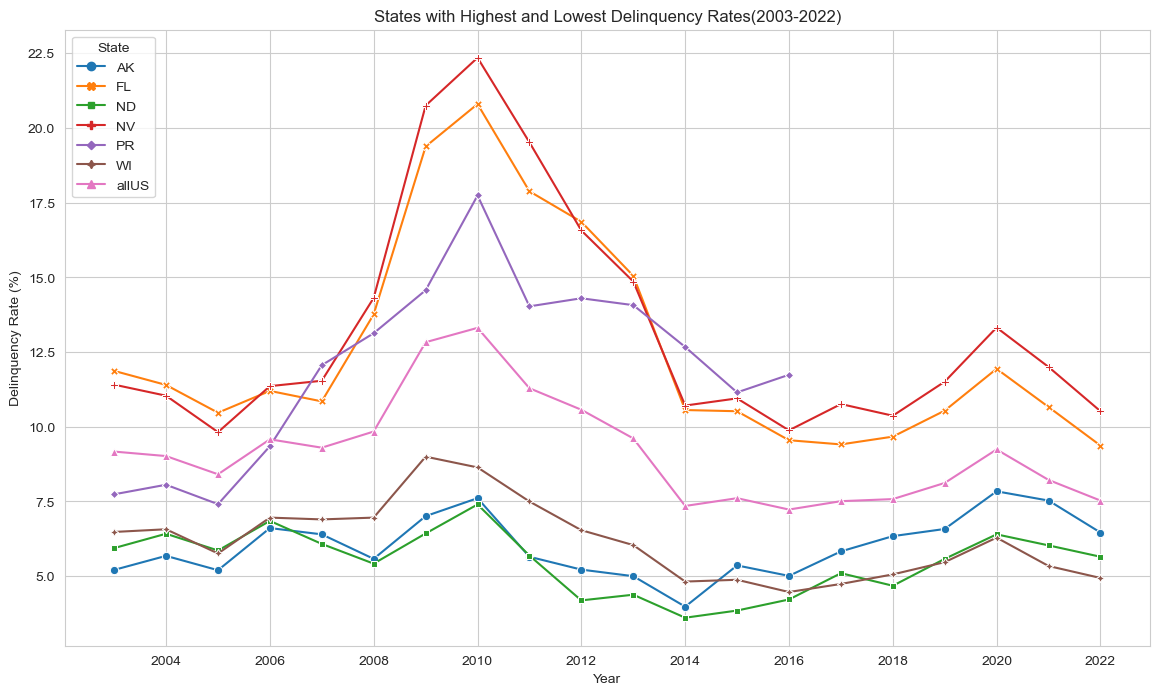

In [45]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=selected_states_lowest_highest, x="year", y="delinquency", hue="state", style="state", markers=True, dashes=False)

plt.title('States with Highest and Lowest Delinquency Rates(2003-2022)')
plt.xlabel('Year')
plt.ylabel('Delinquency Rate (%)')
plt.legend(title='State', loc='upper left')
sns.set_style("whitegrid")

plt.show()

In [29]:
variance_by_state = df_melted_cc90.groupby('state')['delinquency'].var()
state_most_variance = variance_by_state.sort_values(ascending=False).head(10)
print(state_most_variance)
state_least_variance = variance_by_state.sort_values(ascending=False).tail(10)
print(state_least_variance)

state
NV    14.167241
FL    12.291506
CA     9.476936
PR     9.040736
AZ     7.074121
MS     6.701856
TX     4.789740
SC     4.315026
OR     3.665632
RI     3.635300
Name: delinquency, dtype: float64
state
KS    1.289975
NE    1.244648
OH    1.191917
VA    1.114487
IA    1.109133
ND    1.089431
AK    1.016142
NM    0.912188
WY    0.736115
SD    0.714433
Name: delinquency, dtype: float64


In [30]:
high_risk_states = [state for state in state_most_variance.index if state in state_most_delinquency]
high_risk_states

['NV', 'FL', 'CA', 'PR', 'AZ', 'MS', 'TX', 'SC']

In [31]:
low_risk_states = [state for state in state_least_variance.index if state in state_least_delinquency]
low_risk_states

['NE', 'VA', 'IA', 'ND', 'AK', 'SD']

**90 day delinquency rates on cc by state:**
- States with highest 90 day dleincuncy rates: NV, FL, PR, TX, AZ, CA, SC, MS. All with over 10% for the last 20 years. 
- States with lowest 90 day dleincuncy rates: IA, UT, VA, WA, MN, SD, NE, WI, AK, ND all with bellow 7% for the last 20 years. 
- Low risk states identified as ['NE', 'VA', 'IA', 'ND', 'AK', 'SD'], those with 10 lowest varience and 10 lowest delinquency. 
- High risk states identified as ['NV', 'FL', 'CA', 'PR', 'AZ', 'MS', 'TX', 'SC'], those with 10 highest varience and 10 highest delinquency. 